In [44]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [8]:
iris_dataset = load_iris()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.4, random_state=42)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

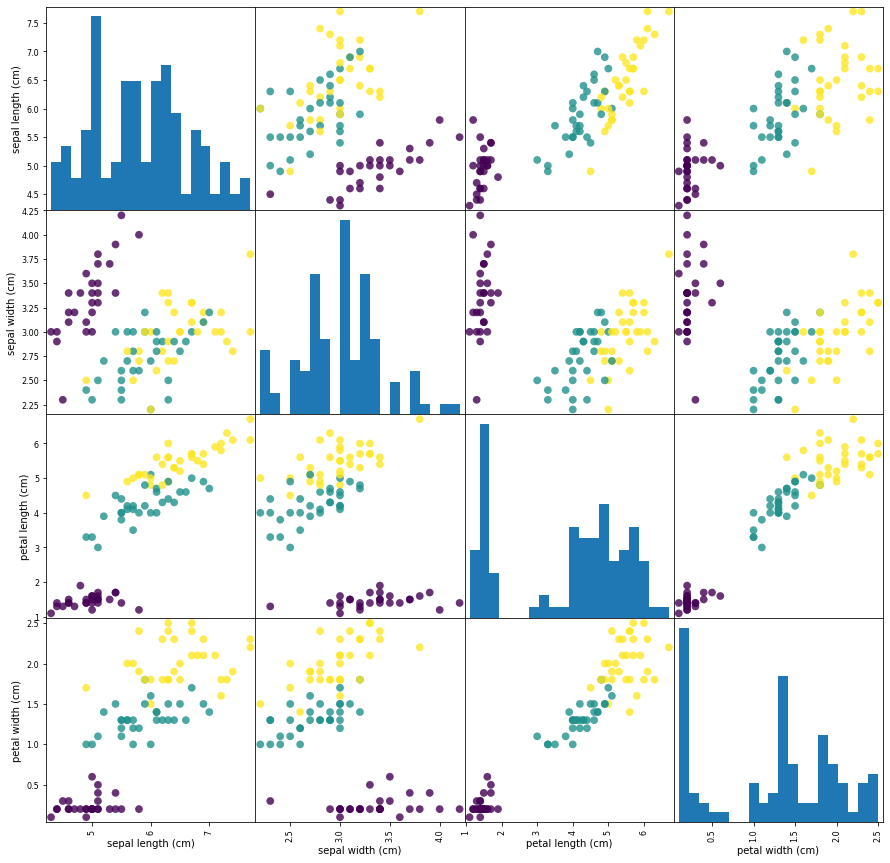

In [39]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# scatter plot of each feature and color by class
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)

In [40]:
k = 10

In [41]:
knn = KNeighborsClassifier(n_neighbors=k)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [43]:
y_pred_KNN = knn.predict(X_test)
cnf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cnf_matrix_KNN)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [47]:
import numpy as np

In [78]:
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = []
        for x in X:
            dis = np.sqrt(((self.X_train - x) ** 2).sum(axis=1))
            k_indices = np.argsort(dis)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            predicted_labels.append(np.argmax(np.bincount(k_nearest_labels)))
        return np.array(predicted_labels)

In [79]:
y_pred_knn = knn.predict(X_test)
cnf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(cnf_matrix_knn)

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [80]:
knn_new = KNN(k=3)
knn_new.fit(X_train, y_train)
y_pred_KNN_new = knn_new.predict(X_test)
cnf_matrix_knn_new = confusion_matrix(y_test, y_pred_KNN_new)
print(cnf_matrix_knn_new)


[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
